In [1]:
# Connect google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Import Required Packages for EDA

# os library is used to interact with the operating system, such as navigating file directories
import os

# pandas library is used for data manipulation and analysis, providing data structures such as DataFrames and Series
import pandas as pd

# numpy library is used for numerical operations in Python, providing a variety of mathematical functions that are useful for working with arrays of numbers
import numpy as np

# matplotlib library is used for creating visualizations, providing a wide variety of plotting functions and styles to create static, interactive, and animated plots
import matplotlib.pyplot as plt

# seaborn library provides a higher-level interface for creating statistical graphics, simplifying the process of creating common types of plots, such as heatmaps, scatterplots, and bar charts
import seaborn as sns

# missingno library is used for visualizing missing data in a dataset, providing a simple way to visualize the distribution of missing values in a DataFrame
import missingno as msno 

# plotly.graph_objects library is used for creating interactive visualizations, providing a variety of chart types and features for creating highly customizable and interactive graphs
import plotly.graph_objects as go 

# plotly.express library provides a simpler interface for creating many types of charts, including scatterplots, line charts, and bar charts, built on top of plotly.graph_objects
import plotly.express as px 

# %matplotlib inline magic command is used to display plots inline in Jupyter notebooks
%matplotlib inline

# warnings library is used to handle warning messages in Python, allowing you to control the behavior of warnings in your code
import warnings

# warnings.filterwarnings() method allows you to control the behavior of warnings in your code, such as ignoring certain warnings or displaying them only once
warnings.filterwarnings('ignore')


In [22]:
#Read the dataset/s
# df - field, which is going to read all the content from the file and it will be stored into df
# pd  - Panda Library (reads everything from the file)
# pd.read_csv() method is used to read a CSV file and create a DataFrame from it
# The file path to the CSV file is specified as a string, in this case, '/content/drive/MyDrive/Capstone Project 3/clean_dataset.csv'
# The resulting DataFrame is stored in a variable called 'df', which can be used to access and manipulate the data in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 3/clean_dataset.csv')

In [23]:
#1 Checking description(first 5 and last 5 rows)
# The .head() method is used to display the first few rows of a DataFrame, by default the first 5 rows
# This can be useful for quickly checking the structure and contents of a DataFrame, to ensure that the data has been loaded and processed correctly
df.head()

Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560         1  
2       ByBirth      280     824         1  
3       ByBirth      100       3         1  
4  ByOtherMeans      120       0         1

In [24]:
df.tail() #last 5 rows

Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
685           1.25             0         0            0               0   
686           2.00             0         1            2               1   
687           2.00             0         1            1               1   
688           0.04             0         0            0               0   
689           8.29             0         0            0               1   

     Citizen  ZipCode  Income  Approved  
685  ByBirth      260       0         0  
686  ByBirth      200     394         0  
687  ByBirth      200       1         0  
688  ByBirth      280     750         0  
689  ByBirth        0       0         0

In [25]:
#Check how many total number of rows and columns-data shape(attributes & samples)
# The .shape attribute is used to retrieve the dimensions of a DataFrame as a tuple, where the first element is the number of rows and the second element is the number of columns
# This can be useful for quickly checking the size of a DataFrame, especially when working with large datasets

df.shape

(690, 16)

In [26]:
# name of the attributes
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [27]:
#unique values for each attribute (Useful for predictive analysis)
# The .nunique() method is used to count the number of unique values in each column of a DataFrame
# This can be useful for getting a quick summary of the data in each column, to understand the range of values and the presence of any duplicates or missing values

df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [28]:
#Complete info about data frame
# The .info() method is used to display a summary of the DataFrame, including the column names, data types, non-null values, and memory usage
# This can be useful for getting a quick overview of the dataset, including any missing or unexpected data types, and the total memory usage of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


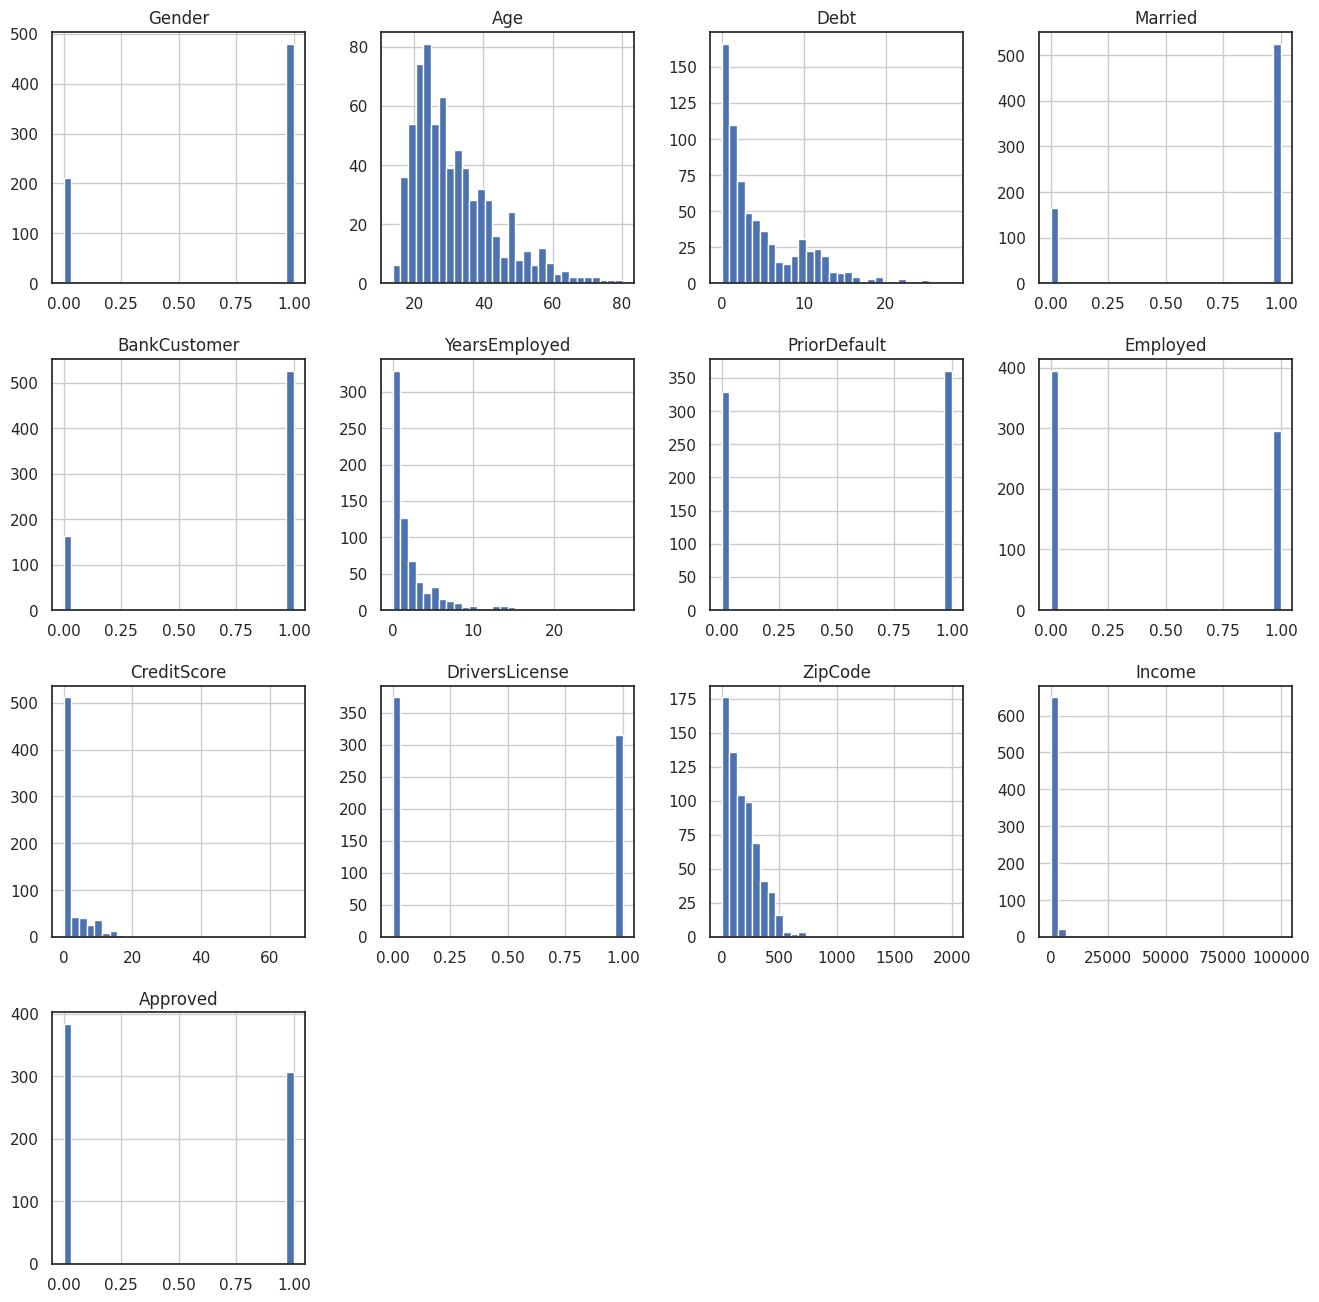

In [29]:
# Visualising data  distribution in detail
#  plt - library (import matplotlib.pyplot as plt)

# Creates a new Figure object using the plt.figure() method, and sets the size of the figure to (16,16)
# using the figsize parameter. This is the size of the plot in inches.
fig = plt.figure(figsize =(16,16))
# Gets the current axes of the Figure object, using the gca() method of the Figure object.
ax=fig.gca()
# Creates a histogram # of the data in the DataFrame, using the hist() method.
df.hist(ax=ax,bins =30)
# Displays the plot using the plt.show() method, which shows the plot in a new window.
# The ax parameter specifies the axes to use for the plot, which in this case is the current 
# axes of the Figure object. The bins parameter sets the number of bins to use for the histogram.
plt.show()
# The resulting plot is a histogram of the values in each column of the DataFrame, 
# which can be useful for visualizing the distribution of the data 
# and identifying any outliers or unexpected patterns.

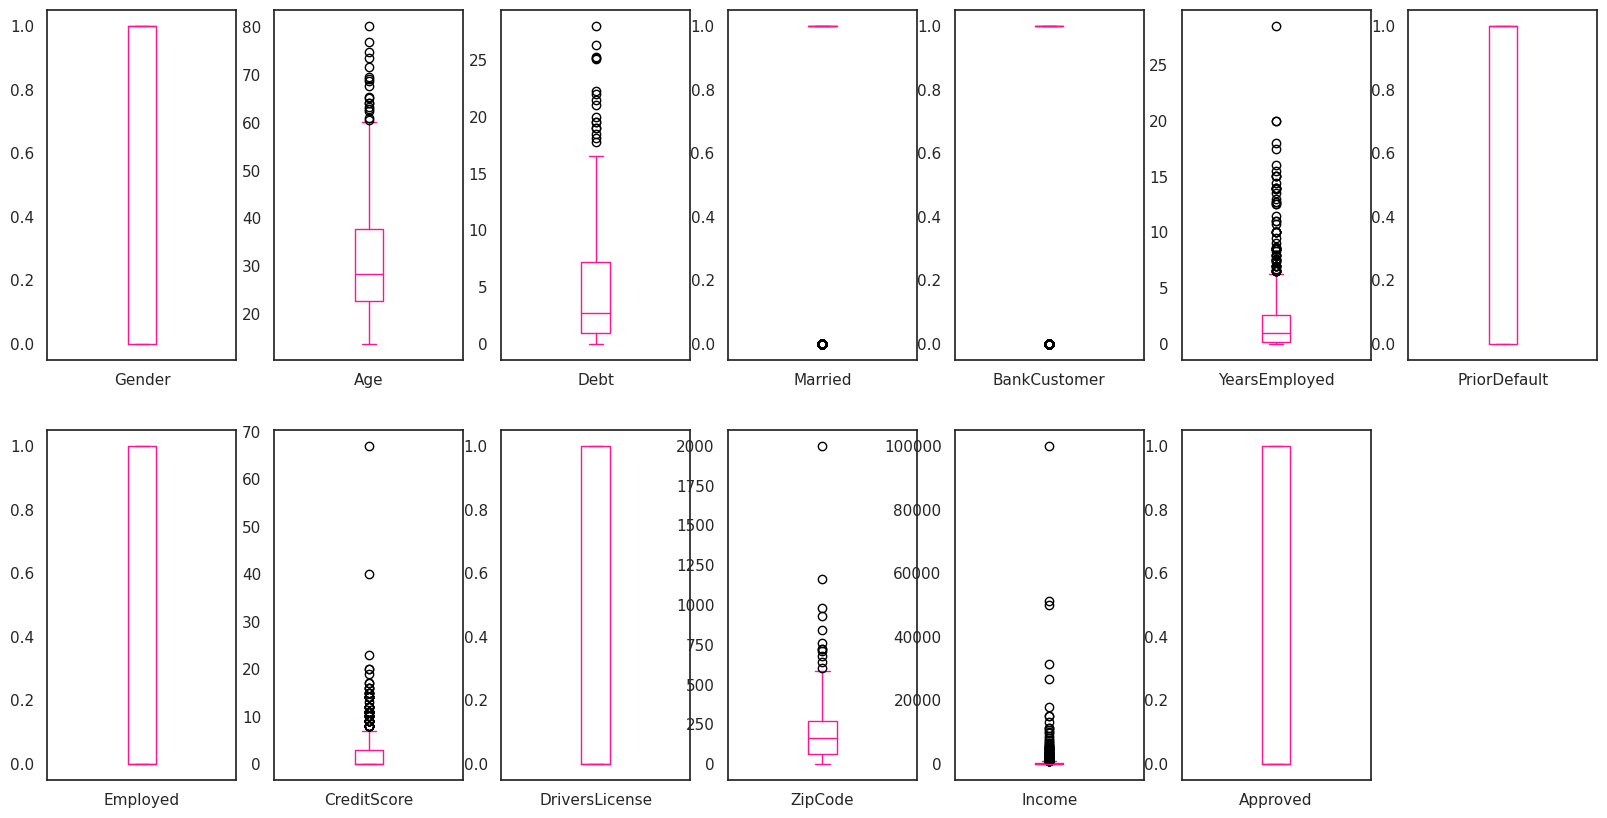

In [30]:
#detecting outliers
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

In [31]:
#identify the outliers
# define continuous variable & plot
continous_features = ['Age','Debt','YearsEmployed', 'CreditScore','ZipCode', 'Income']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])

For the feature Age, No of Outliers is 18
For the feature Debt, No of Outliers is 17
For the feature YearsEmployed, No of Outliers is 63
For the feature CreditScore, No of Outliers is 79
For the feature ZipCode, No of Outliers is 12
For the feature Income, No of Outliers is 113


In [32]:
#drop the outliers
outliers(df[continous_features], drop = True)

Outliers from Age feature removed
Outliers from Debt feature removed
Outliers from YearsEmployed feature removed
Outliers from CreditScore feature removed
Outliers from ZipCode feature removed
Outliers from Income feature removed


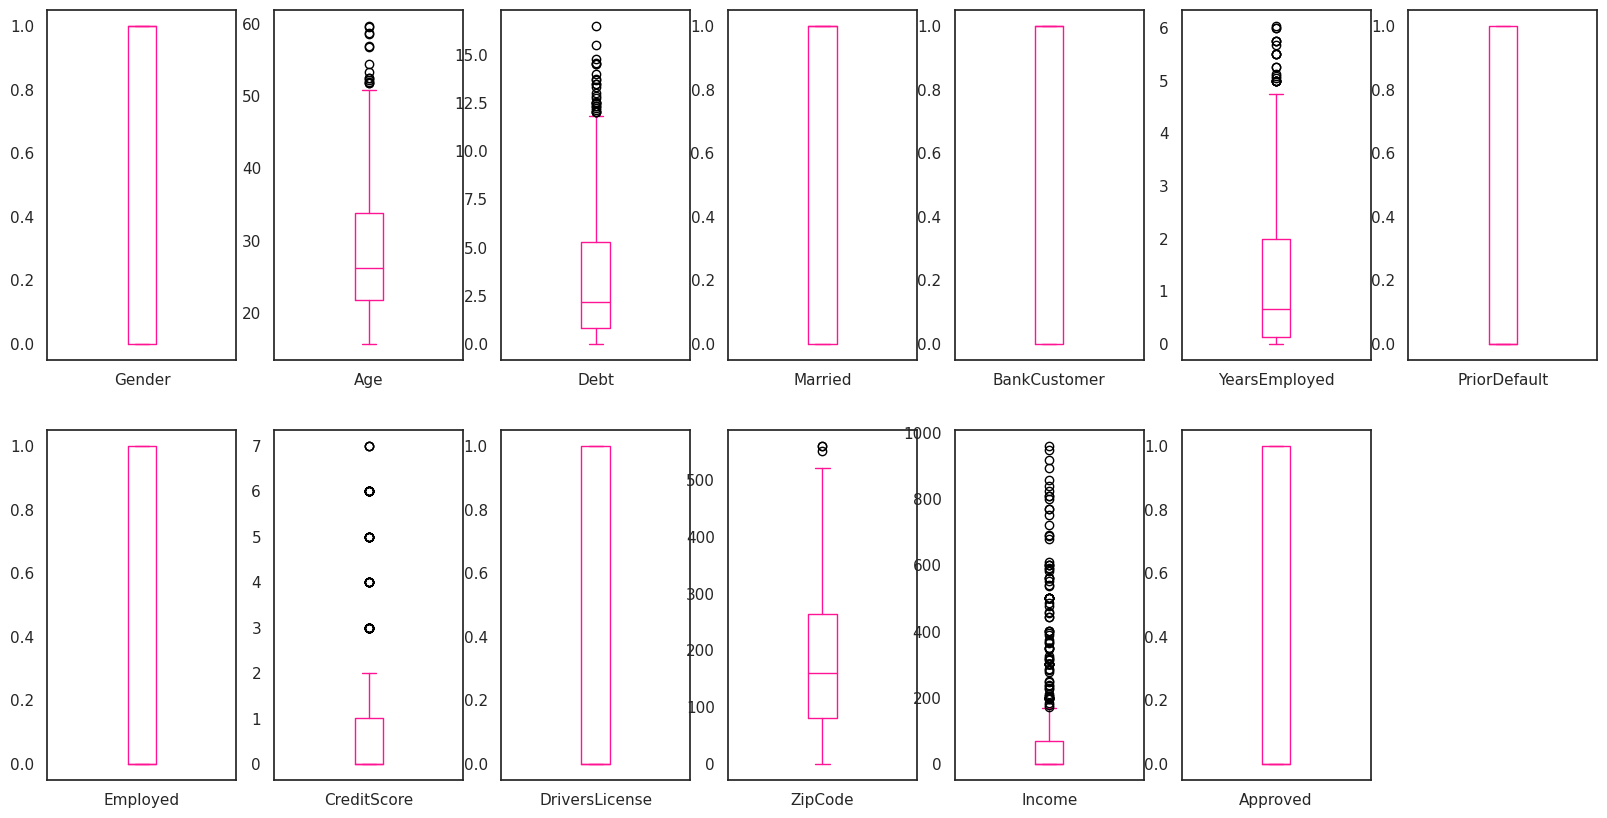

In [33]:
#check if outliers got removed
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

In [ ]:
#Check data shape after outlier removal
df.shape


(473, 16)

0    321
1    152
Name: Approved, dtype: int64


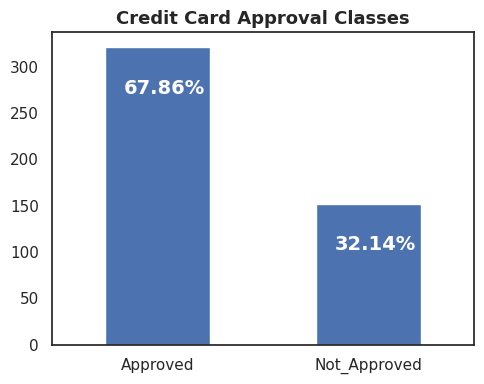

In [34]:
#checking target value distribution
print(df.Approved.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Approved", "Not_Approved"]
ax = df.Approved.value_counts().plot(kind='bar')
ax.set_title("Credit Card Approval Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()


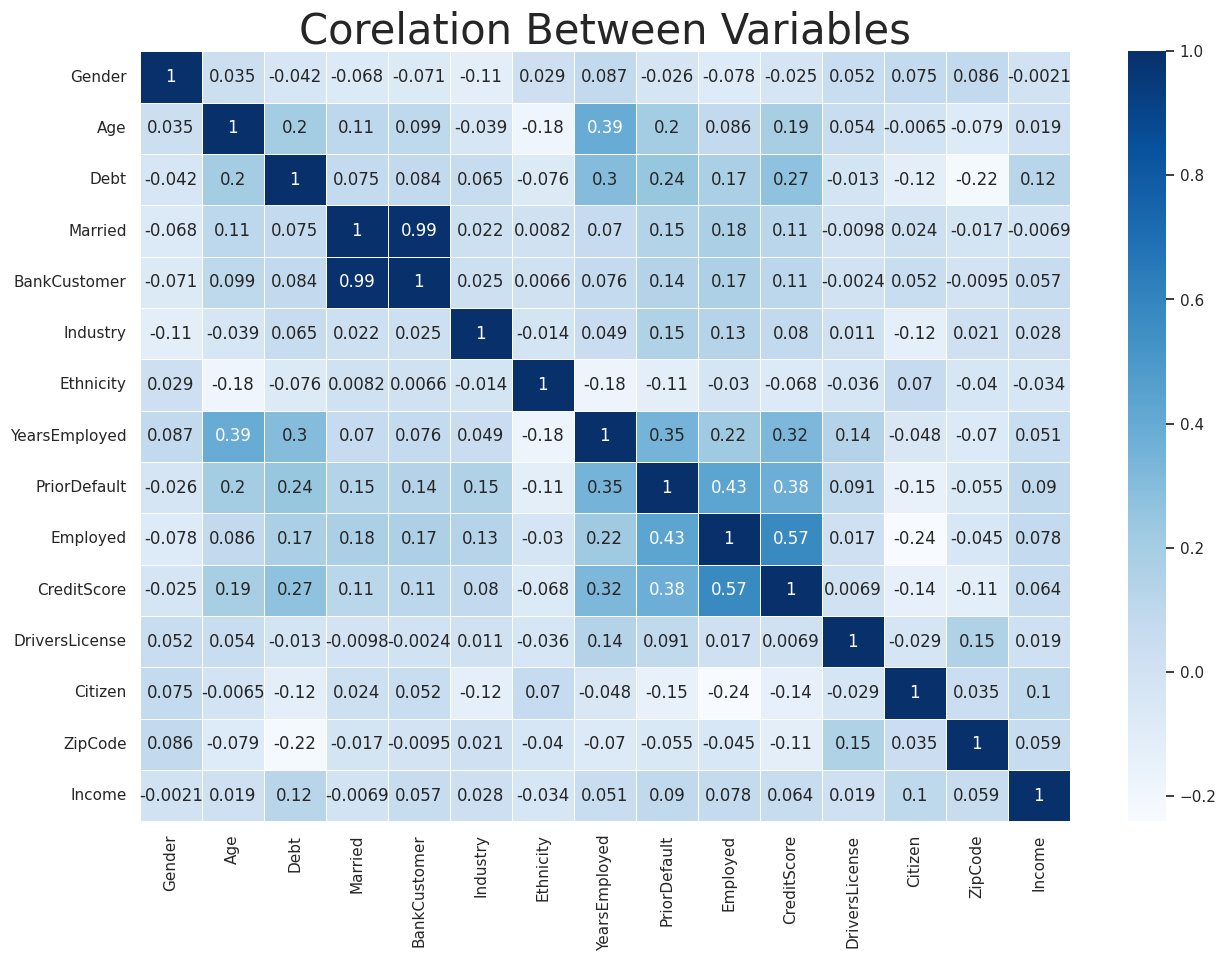

In [17]:
#check correlation between variables
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()


In [37]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.6 MB 20.9 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=a848f347f5615eaba68ac693f2d5111e34c06738bcccfc4a5c369d741b490d4f
  Stored in directory: /tmp/pip-ephem-wheel-c

In [38]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Credit Card Approvals",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df


Gender    Age    Debt  Married  BankCustomer  Industry  Ethnicity  \
0         1  30.83   0.000        1             1       7.0        4.0   
1         0  58.67   4.460        1             1       9.0        1.0   
2         0  24.50   0.500        1             1       9.0        1.0   
3         1  27.83   1.540        1             1       7.0        4.0   
4         1  20.17   5.625        1             1       7.0        4.0   
..      ...    ...     ...      ...           ...       ...        ...   
684       1  40.58   3.290        1             1       0.0        4.0   
685       1  21.08  10.085        0             0       3.0        1.0   
686       0  22.67   0.750        1             1       4.0        4.0   
687       0  25.25  13.500        0             0       6.0        2.0   
688       1  17.92   0.205        1             1       2.0        4.0   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0             1.25             1         1            1               0   
1             3.04             1         1            6               0   
2             1.50             1         0            0               0   
3             3.75             1         1            5               1   
4             1.71             1         0            0               0   
..             ...           ...       ...          ...             ...   
684           3.50             0         0            0               1   
685           1.25             0         0            0               0   
686           2.00             0         1            2               1   
687           2.00             0         1            1               1   
688           0.04             0         0            0               0   

     Citizen  ZipCode  Income  Approved  
0        0.0      202       0         1  
1        0.0       43     560         1  
2        0.0      280     824         1  
3        0.0      100       3         1  
4        1.0      120       0         1  
..       ...      ...     ...       ...  
684      1.0      400       0         0  
685      0.0      260       0         0  
686      0.0      200     394         0  
687      0.0      200       1         0  
688      0.0      280     750         0  

[473 rows x 16 columns]

In [41]:
class_label =df['Approved']
df = df.drop(['Approved'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['Approved']=class_label
df
# Overall, this code is used to perform data preprocessing 
# by normalizing the data and separating the target variable (i.e., 'Approved') from the feature set.

Gender       Age      Debt  Married  BankCustomer  Industry  Ethnicity  \
0       1.0  0.343352  0.000000      1.0           1.0  0.538462       1.00   
1       0.0  0.977231  0.270303      1.0           1.0  0.692308       0.25   
2       0.0  0.199226  0.030303      1.0           1.0  0.692308       0.25   
3       1.0  0.275046  0.093333      1.0           1.0  0.538462       1.00   
4       1.0  0.100638  0.340909      1.0           1.0  0.538462       1.00   
..      ...       ...       ...      ...           ...       ...        ...   
684     1.0  0.565346  0.199394      1.0           1.0  0.000000       1.00   
685     1.0  0.121357  0.611212      0.0           0.0  0.230769       0.25   
686     0.0  0.157559  0.045455      1.0           1.0  0.307692       1.00   
687     0.0  0.216302  0.818182      0.0           0.0  0.461538       0.50   
688     1.0  0.049408  0.012424      1.0           1.0  0.153846       1.00   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0         0.206954           1.0       1.0     0.142857             0.0   
1         0.503311           1.0       1.0     0.857143             0.0   
2         0.248344           1.0       0.0     0.000000             0.0   
3         0.620861           1.0       1.0     0.714286             1.0   
4         0.283113           1.0       0.0     0.000000             0.0   
..             ...           ...       ...          ...             ...   
684       0.579470           0.0       0.0     0.000000             1.0   
685       0.206954           0.0       0.0     0.000000             0.0   
686       0.331126           0.0       1.0     0.285714             1.0   
687       0.331126           0.0       1.0     0.142857             1.0   
688       0.006623           0.0       0.0     0.000000             0.0   

     Citizen   ZipCode    Income  Approved  
0        0.0  0.360714  0.000000         1  
1        0.0  0.076786  0.583333         1  
2        0.0  0.500000  0.858333         1  
3        0.0  0.178571  0.003125         1  
4        0.5  0.214286  0.000000         1  
..       ...       ...       ...       ...  
684      0.5  0.714286  0.000000         0  
685      0.0  0.464286  0.000000         0  
686      0.0  0.357143  0.410417         0  
687      0.0  0.357143  0.001042         0  
688      0.0  0.500000  0.781250         0  

[473 rows x 16 columns]

In [42]:
#pre-processing
cc_data = df.copy()
le = preprocessing.LabelEncoder()
gender = le.fit_transform(list(cc_data["Gender"])) # gender (1 = male; 0 = female)
age = le.fit_transform(list(cc_data["Age"])) # age in years
debt = le.fit_transform(list(cc_data["Debt"])) # debt amount
married = le.fit_transform(list(cc_data["Married"])) # marital status (1 = yes; 0 = no)
bankcustomer = le.fit_transform(list(cc_data["BankCustomer"])) # bank customer (1 = yes; 0 = no)
industry = le.fit_transform(list(cc_data["Industry"])) # type of industry
ethnicity = le.fit_transform(list(cc_data["Ethnicity"])) # ethnicity
yearsemployed = le.fit_transform(list(cc_data["YearsEmployed"])) # years employed
priordefault = le.fit_transform(list(cc_data["PriorDefault"])) # previous credit default (1 = yes; 0 = no)
employed = le.fit_transform(list(cc_data["Employed"])) # employed status (1 = yes; 0 = no)
creditscore = le.fit_transform(list(cc_data["CreditScore"])) # credit score
driverslicense = le.fit_transform(list(cc_data["DriversLicense"])) # driver's license (1 = yes; 0 = no)
citizen = le.fit_transform(list(cc_data["Citizen"])) # citizenship status
zipcode = le.fit_transform(list(cc_data["ZipCode"])) # zip code
income = le.fit_transform(list(cc_data["Income"])) # income
approved = le.fit_transform(list(cc_data["Approved"])) # credit card approval (1 = approved; 0 = not approved)


In [38]:
import sklearn.model_selection
x = list(zip(gender,	age,	debt,	married,	bankcustomer,	industry,	ethnicity,	yearsemployed,	priordefault,	employed,	creditscore,	driverslicense,	citizen,	zipcode,	income))
y = list(approved)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows


In [39]:
#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((552, 15), (138, 15))

In [40]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.856888 (0.038956)

SVM: 0.722752 (0.042235)

GBM: 0.847879 (0.039126)

RF: 0.865962 (0.025178)



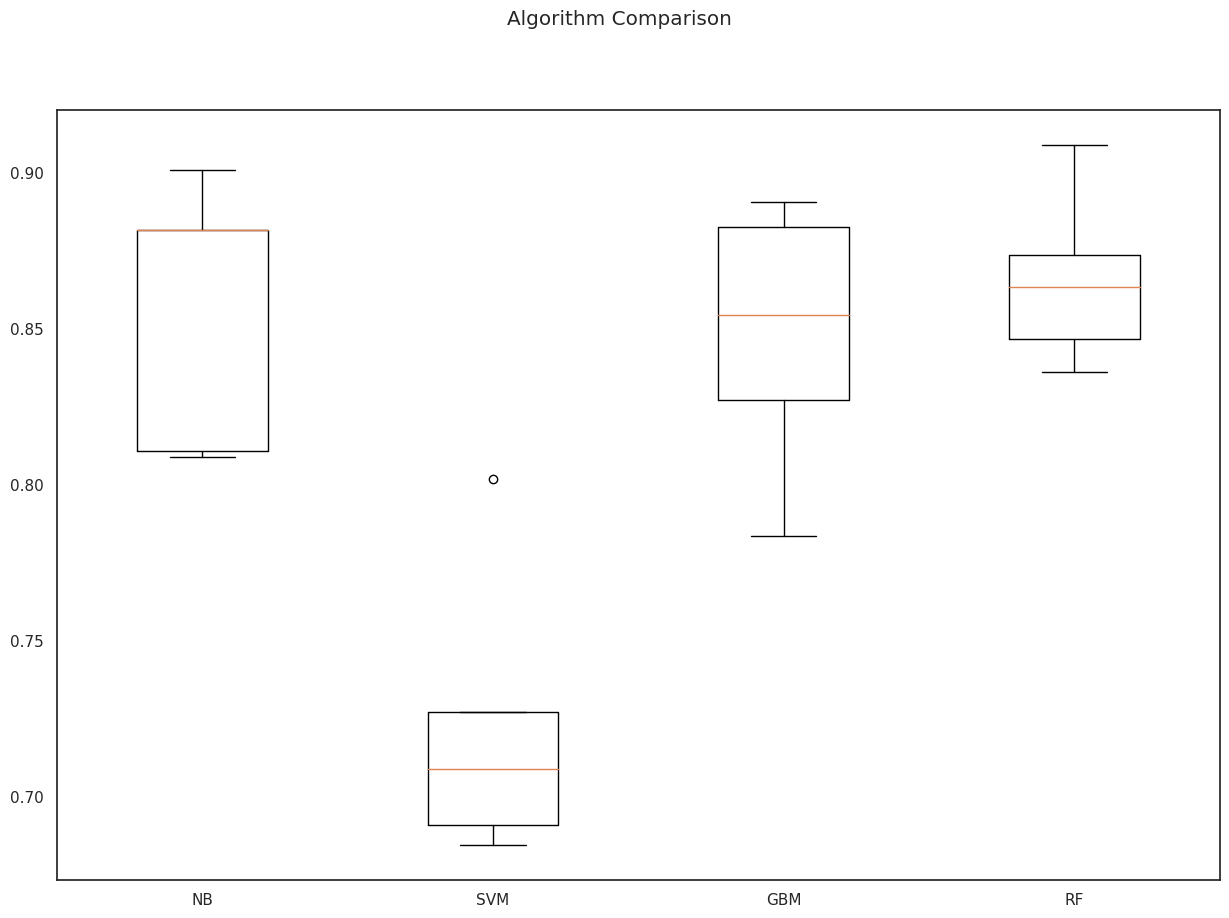

In [41]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [42]:
#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

best_model = rf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.8695652173913043


In [43]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.86      0.89        81
           1       0.82      0.88      0.85        57

    accuracy                           0.87       138
   macro avg       0.86      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



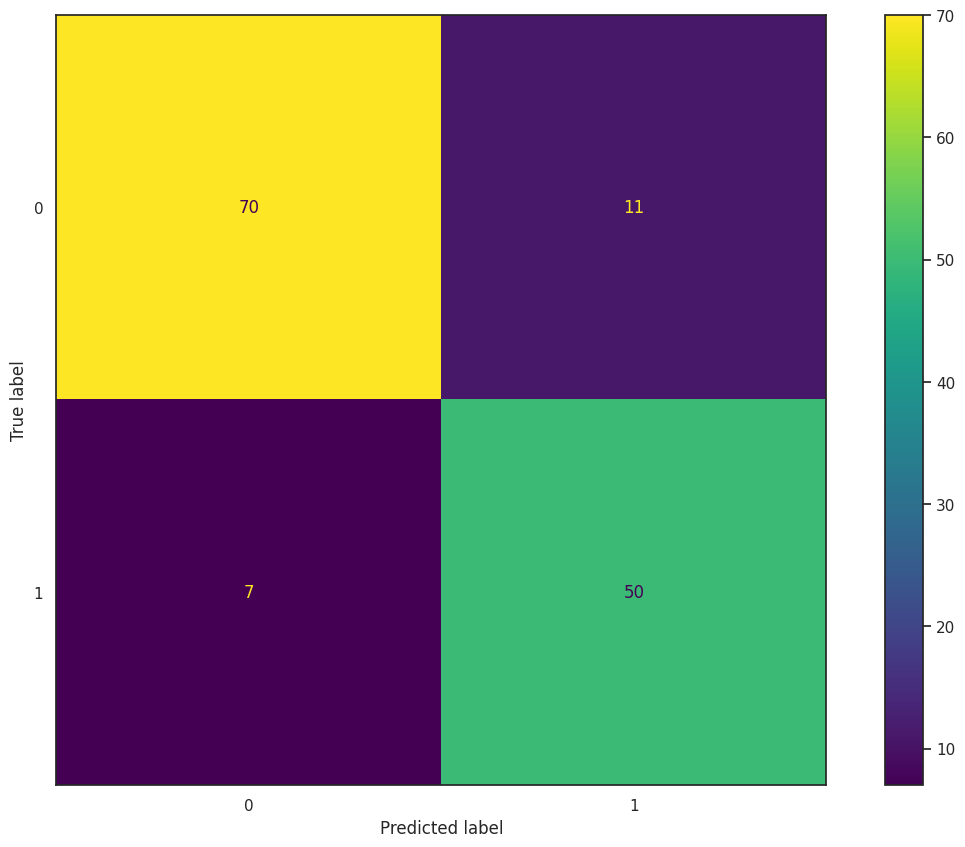

In [44]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


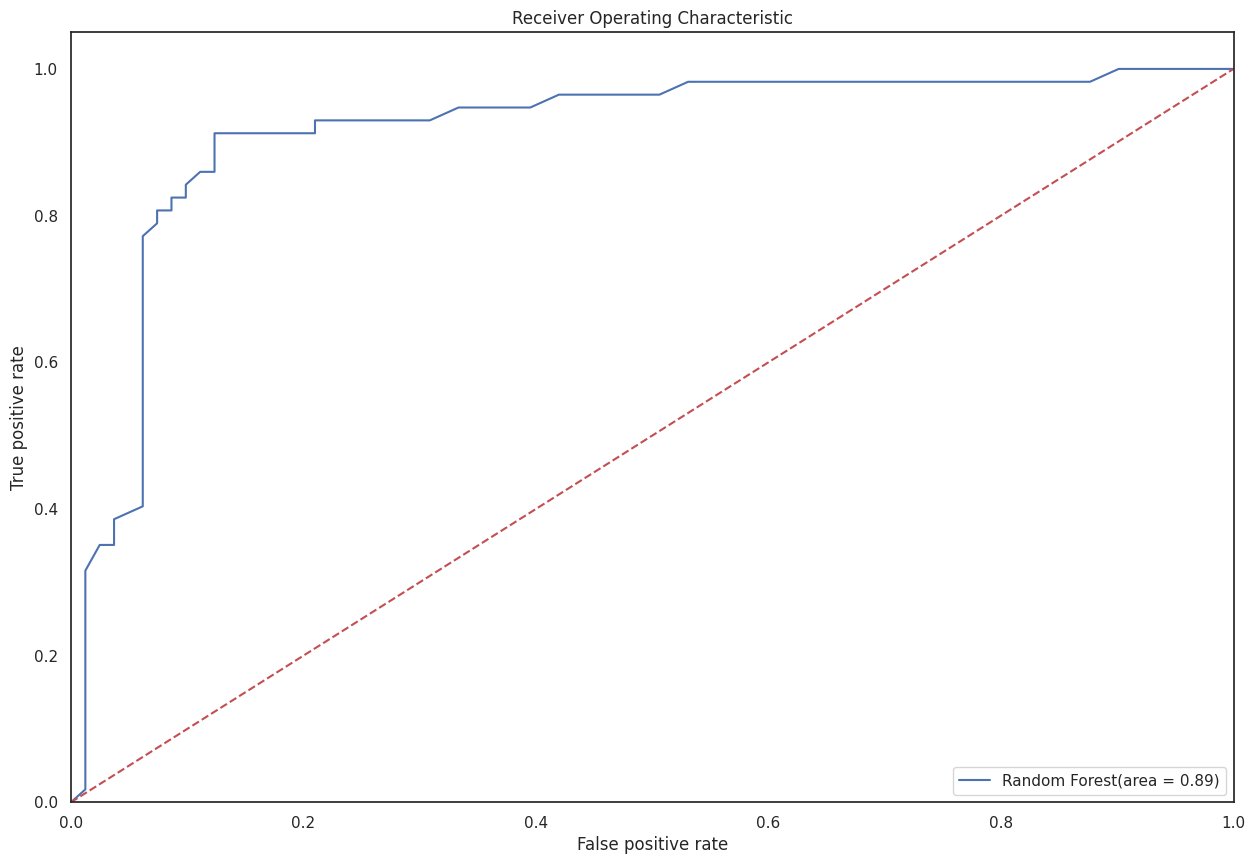

In [45]:
#Model Evaluation Metric 3- ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [46]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)


Predicted:  0 Actual:  0 Data:  (0, 308, 5, 1, 1, 6, 2, 0, 0, 0, 0, 1, 1, 18, 25)
Predicted:  0 Actual:  1 Data:  (0, 22, 12, 0, 1, 8, 2, 114, 0, 0, 0, 1, 1, 100, 0)
Predicted:  1 Actual:  1 Data:  (0, 19, 163, 1, 1, 13, 1, 25, 1, 1, 11, 0, 0, 0, 199)
Predicted:  0 Actual:  1 Data:  (1, 283, 115, 1, 1, 5, 4, 1, 0, 0, 0, 0, 0, 0, 195)
Predicted:  1 Actual:  1 Data:  (1, 51, 99, 0, 0, 7, 4, 51, 1, 1, 1, 1, 0, 23, 93)
Predicted:  1 Actual:  1 Data:  (0, 203, 30, 1, 1, 2, 4, 19, 1, 1, 4, 0, 0, 0, 174)
Predicted:  0 Actual:  0 Data:  (1, 125, 32, 0, 0, 10, 1, 64, 0, 0, 0, 0, 0, 60, 116)
Predicted:  1 Actual:  1 Data:  (1, 320, 176, 1, 1, 0, 4, 30, 1, 1, 4, 1, 0, 67, 0)
Predicted:  0 Actual:  0 Data:  (1, 282, 90, 1, 1, 13, 0, 2, 0, 0, 0, 1, 0, 154, 0)
Predicted:  0 Actual:  0 Data:  (1, 102, 77, 1, 1, 4, 1, 52, 0, 1, 1, 1, 0, 133, 21)
Predicted:  1 Actual:  1 Data:  (1, 61, 163, 1, 1, 13, 4, 7, 1, 1, 6, 0, 0, 38, 0)
Predicted:  0 Actual:  0 Data:  (1, 212, 54, 1, 1, 1, 4, 6, 0, 0, 0, 1, 0, 